<a href="https://colab.research.google.com/github/voronoii/tacademy/blob/main/main_Copy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [3]:
cd colab_/predictsalary/

/content/gdrive/My Drive/colab_/predictsalary


In [4]:

import pandas as pd
path = 'train.csv'
data = pd.read_csv(path)
# data2 = pd.read_csv(path2)
# data = pd.concat([data, data2])
data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [ ]:
# 결측치, 칼럼, 메모리사용량 등 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
id                26049 non-null int64
age               26049 non-null int64
workclass         26049 non-null object
fnlwgt            26049 non-null int64
education         26049 non-null object
education_num     26049 non-null int64
marital_status    26049 non-null object
occupation        26049 non-null object
relationship      26049 non-null object
race              26049 non-null object
sex               26049 non-null object
capital_gain      26049 non-null int64
capital_loss      26049 non-null int64
hours_per_week    26049 non-null int64
native_country    26049 non-null object
income            26049 non-null int64
dtypes: int64(8), object(8)
memory usage: 3.2+ MB


In [ ]:
# 수치데이터 요약
data.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


capital_gain, capital_loss에 0.0이 많아보인다

In [ ]:
data.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,26049,26049,26049,26049,26049,26049,26049,26049,26049
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,18123,8433,11970,3304,10541,22315,17482,23371,19744


In [ ]:
feature_columns = data.columns[:-1].tolist()

In [ ]:
feature_columns

['id',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [ ]:
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)
data['income'].value_counts(normalize=True)

0    0.757956
1    0.242044
Name: income, dtype: float64

## 데이터 시각화 - numeric

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### age - income

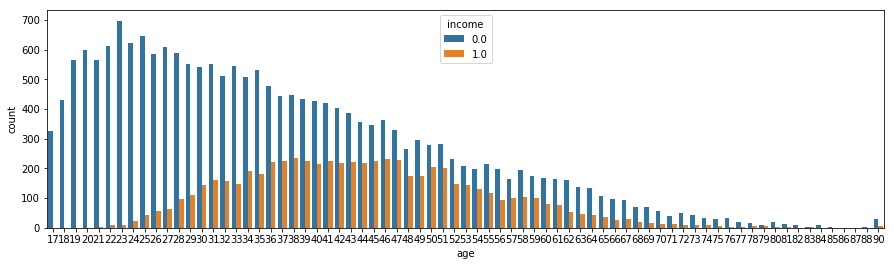

In [ ]:

plt.figure(figsize=(15,4))
sns.countplot(data=data, x="age", hue="income")

countplot - categorical 데이터에 사용

### fnlwgt  - income

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x="fnlwgt", hue="income")

In [ ]:
sns.barplot(data=data, x="income", y="fnlwgt")

### education_num - income

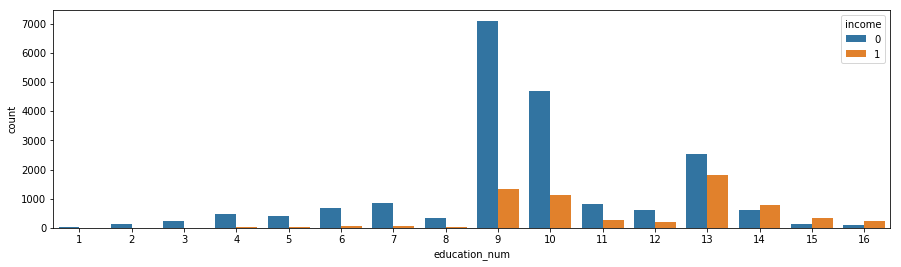

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x="education_num", hue="income")

age, education_num는 continuous data로 다뤄야 할듯
edutation_num은 8을 기점으로 많고 적음으로 나타내보자 


In [ ]:
data['edu_num_high'] = data['education_num'] > 8
data[['edu_num_high', 'education_num']].head()

,edu_num_high,education_num
0,True,9
1,False,5
2,True,10
3,True,10
4,True,10


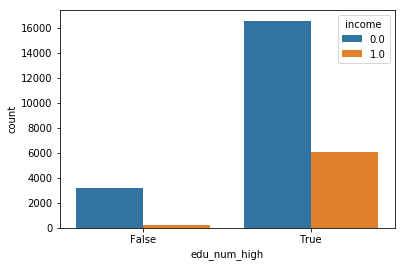

In [ ]:
sns.countplot(data=data, x="edu_num_high", hue="income")

교육횟수가 8번 초과인 경우에도 income이 0인 경우가 많았다 

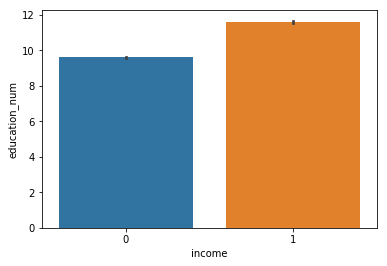

In [ ]:
sns.barplot(data=data, x="income", y="education_num")

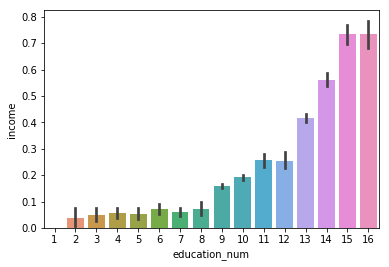

In [ ]:
sns.barplot(data=data, x="education_num", y="income")

### hours_per_week - income

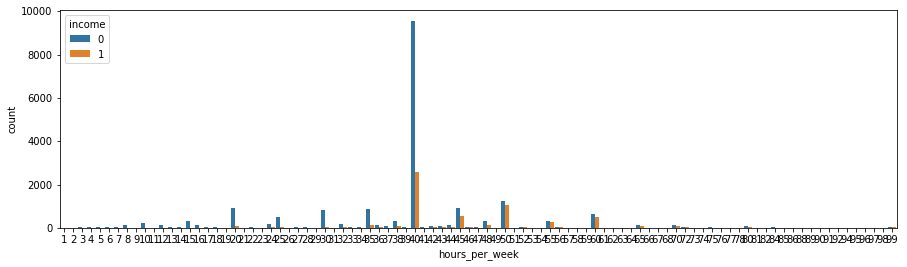

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x="hours_per_week", hue="income")

hours_per_week를 범주형으로 보기 

In [ ]:
data['hours_per_week_high'] = data['hours_per_week'] > 40
data[['hours_per_week_high', 'hours_per_week']].head()

,hours_per_week_high,hours_per_week
0,True,60
1,False,20
2,False,16
3,False,25
4,False,20


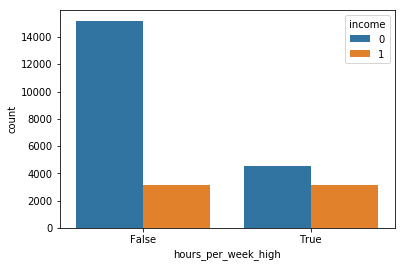

In [ ]:
sns.countplot(data=data, x="hours_per_week_high", hue="income")

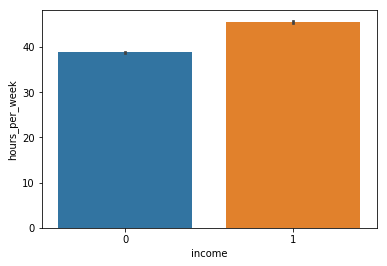

In [ ]:
sns.barplot(data=data, x="income", y="hours_per_week")

평균으로 비교해보면 income이 50k이상인 사람들이 hours_per_week, education_num이 조금더 높은편임을 알 수 있음 

 ### education_num - hours_per_week

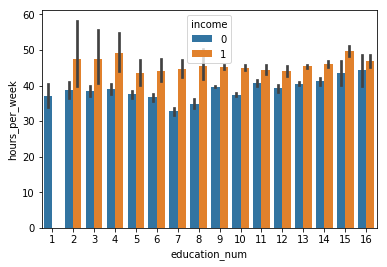

In [ ]:
sns.barplot(data=data, x="education_num", y="hours_per_week", hue="income")

x와y의 상관관계가 보이지는 않지만 hours_per_week는 income치 50k이상인 사람들이 대체적으로 더 높다

### capical_gain, capital_loss, income

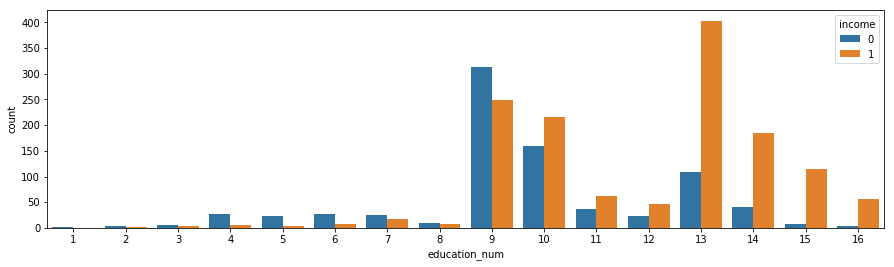

In [ ]:
test = data['capital_gain'] > 0
plt.figure(figsize=(15,4))
sns.countplot(data=data[test], x="education_num", hue="income")

In [ ]:
len(data[test])

2193

capital_gain이 0초과인 사람들 중에서 education_num과 income 

In [ ]:
test2 = data['capital_loss'] > 0
len(data[test2])


1226

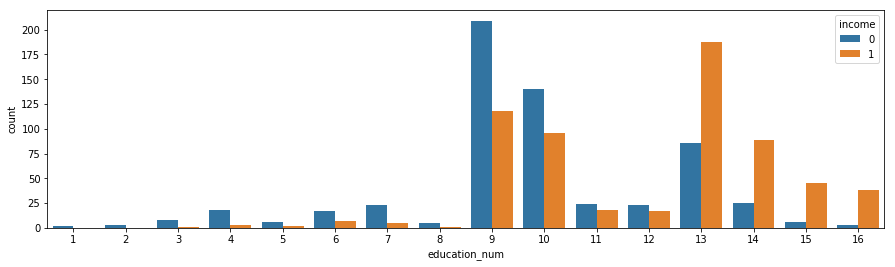

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=data[test2], x="education_num", hue="income")

capital_loss이 0초과인 사람들 중에서 education_num과 income 

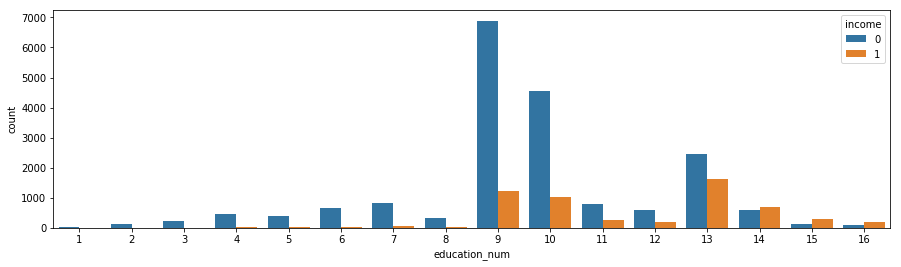

In [ ]:
test2 = data['capital_loss'] == 0
plt.figure(figsize=(15,4))
sns.countplot(data=data[test2], x="education_num", hue="income")

capital_loss이 0인 사람들 중에서 education_num과 income 

In [ ]:
# data["capital_gain_tt"] = data["capital_gain"] > 0 & data["capital_loss"] > 0
# data["capital_gain_tf"] = data["capital_gain"] > 0 & data["capital_loss"] == 0
# data["capital_gain_ft"] = data["capital_gain"] == 0 & data["capital_loss"] > 0
# data["capital_gain_ff"] = data["capital_gain"] == 0 & data["capital_loss"] == 0
# len(data[data["capital_gain_tt"]])
# len(data[data["capital_gain_tt"]])
# len(data[data["capital_g?ain_tt"]])
# len(data[data["capital_gain_tt"]])
t = data["capital_gain"] > 0
tt = data["capital_loss"] > 0
f = data["capital_gain"] == 0
ff = data["capital_loss"] == 0
print(len(data[t & tt]))
print()
print(len(data[t & ff]))
print(data[t & ff]['income'].value_counts(normalize=True))
print()
print(len(data[f & tt]))
print(data[f & tt]['income'].value_counts(normalize=True))
print()
print(len(data[f & ff]))
print( data[f & ff]['income'].value_counts(normalize=True))

0

2193
1    0.627451
0    0.372549
Name: income, dtype: float64

1226
1    0.512235
0    0.487765
Name: income, dtype: float64

22630
0    0.809943
1    0.190057
Name: income, dtype: float64


각 케이스별 데이터 사이즈와 income 비율   
capital_gain, capital_loss 모두 0인 데이터가 제일많음

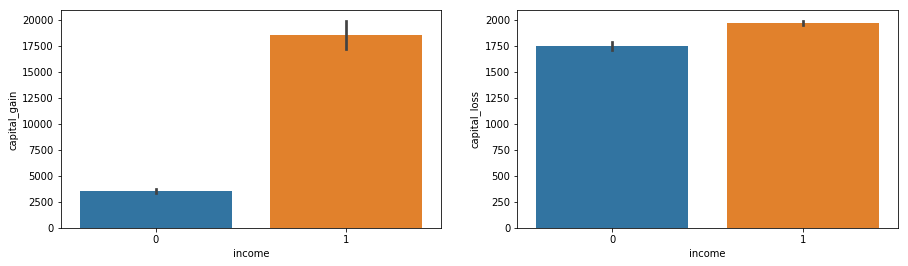

In [ ]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,4)

sns.barplot(data=data[t & ff], x="income", y="capital_gain", ax=ax1) # total 2193
# sns.barplot(data=data[t & ff], x="income", y="capital_loss", ax=ax2)
# sns.barplot(data=data[f & tt], x="income", y="capital_gain", ax=ax3)
sns.barplot(data=data[f & tt], x="income", y="capital_loss", ax=ax2) # total 1226
# sns.barplot(data=data[f & ff], x="income", y="capital_gain", ax=ax5)
# sns.barplot(data=data[f & ff], x="income", y="capital_loss", ax=ax6)

capital_gain > 0이고 capital_loss==0인 데이터에서는 income이 1인 계층이 0인 계층보다 평균 capital_gain이 훨씬 높게 나타난다
capital_gain ==0 이고 capital_loss > 0인 데이터에서는 두 계층이 평균 capital_loss가 높게 나왔다

In [ ]:
data[f & tt]['income'].value_counts(normalize=True)

1    0.512235
0    0.487765
Name: income, dtype: float64

## 데이터 시각화 - continuous

### fnlwgt-income (final weight)

E:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


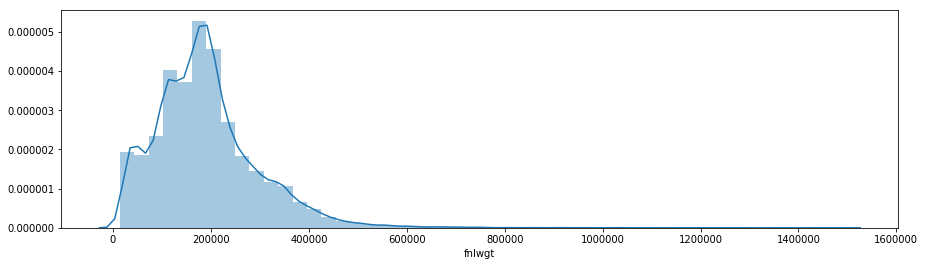

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(data['fnlwgt'])

In [ ]:
income_1 = data[data['income'] == 1]
income_0 = data[data['income'] == 0]
income_1.shape, income_0.shape

((6305, 18), (19744, 18))

E:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


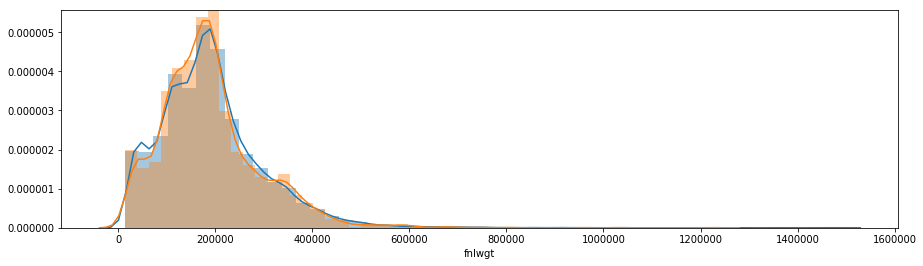

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(income_0['fnlwgt'])
sns.distplot(income_1['fnlwgt'])

income에 따른 두 계층에서 fnlwgt 그래프가 비슷하게 나타난다. 

### age-income

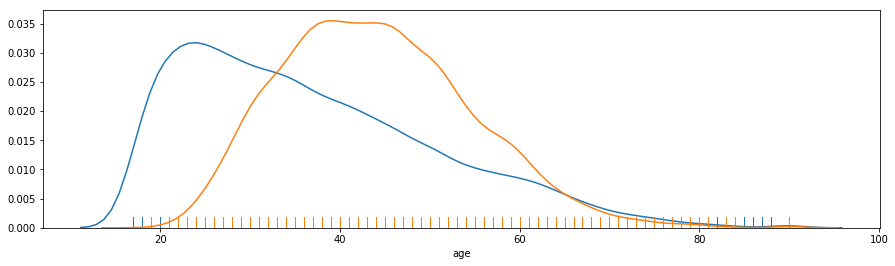

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(income_0['age'], hist=False, rug=True)
sns.distplot(income_1['age'], hist=False, rug=True)

어떤 데이터를 범주형으로 다뤄야 모델이 학습하는데 더 도움이 될때 어떤 값을 기준으로 나눠주어야할지 봐야할 때 distplot 사용 

### education_num-income

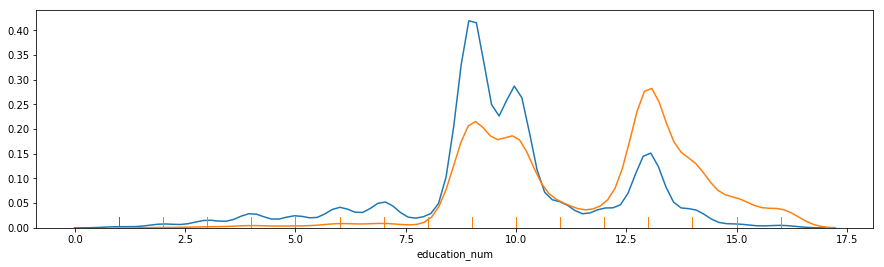

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(income_0['education_num'], hist=False, rug=True)
sns.distplot(income_1['education_num'], hist=False, rug=True)

## hisplot

In [ ]:
data['hours_per_week_high'] = data['hours_per_week_high'].astype(int)
data['edu_num_high'] = data['edu_num_high'].astype(int)

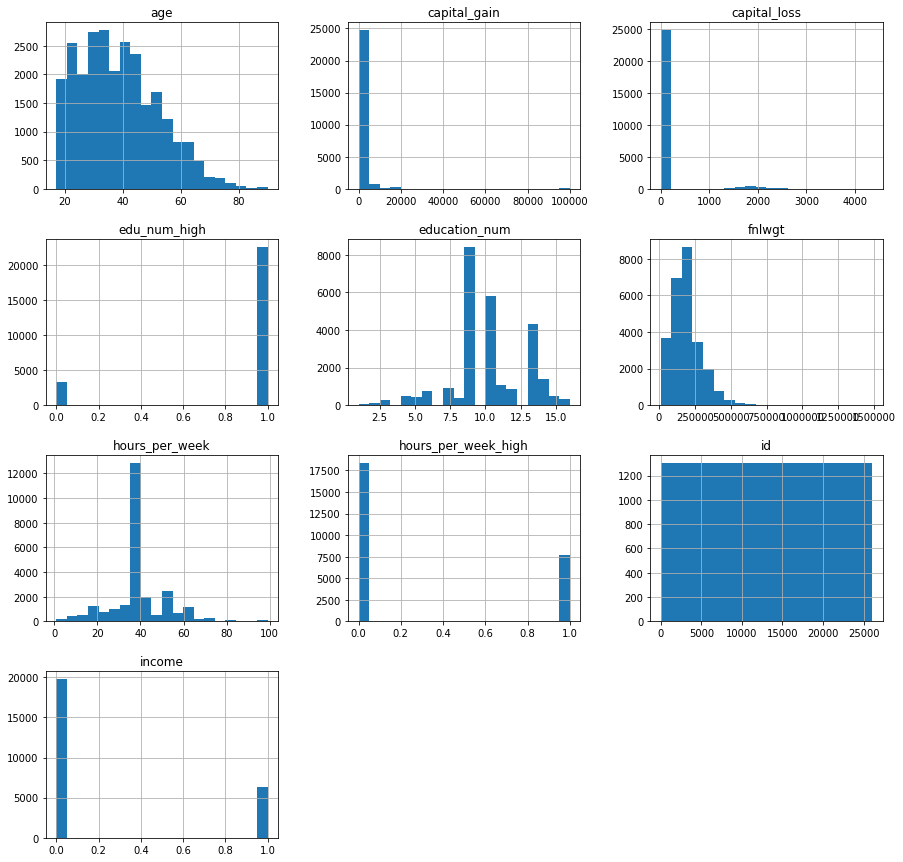

In [ ]:
graph = data.hist(figsize=(15, 15), bins=20)

## violinplot

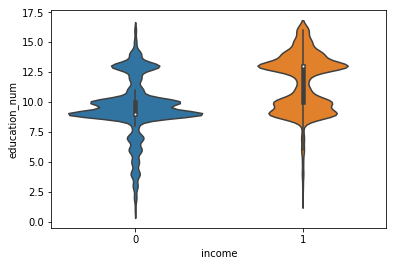

In [ ]:
sns.violinplot(data=data, x="income", y="education_num")


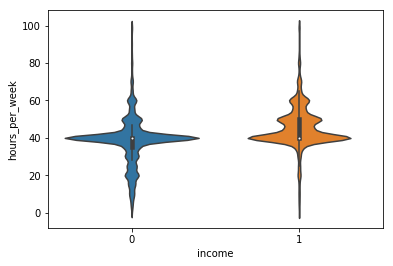

In [ ]:
sns.violinplot(data=data, x="income", y="hours_per_week")


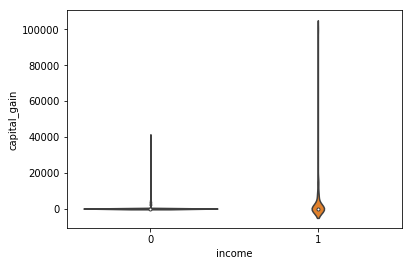

In [ ]:
sns.violinplot(data=data, x="income", y="capital_gain")


## inplot

In [ ]:
### education_num - hours_per_Week

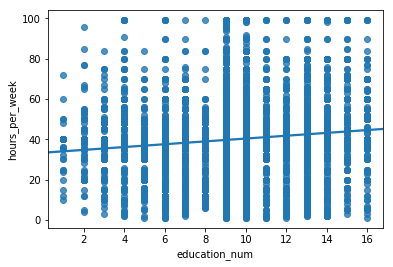

In [ ]:
sns.regplot(data=data, x="education_num", y="hours_per_week")

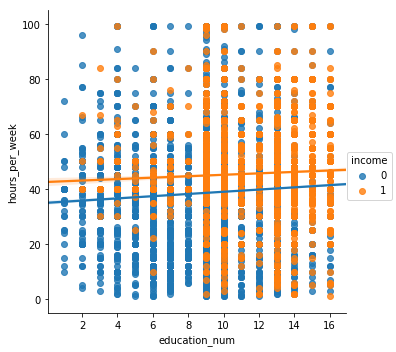

In [ ]:
sns.lmplot(data=data, x="education_num", y="hours_per_week", hue="income")

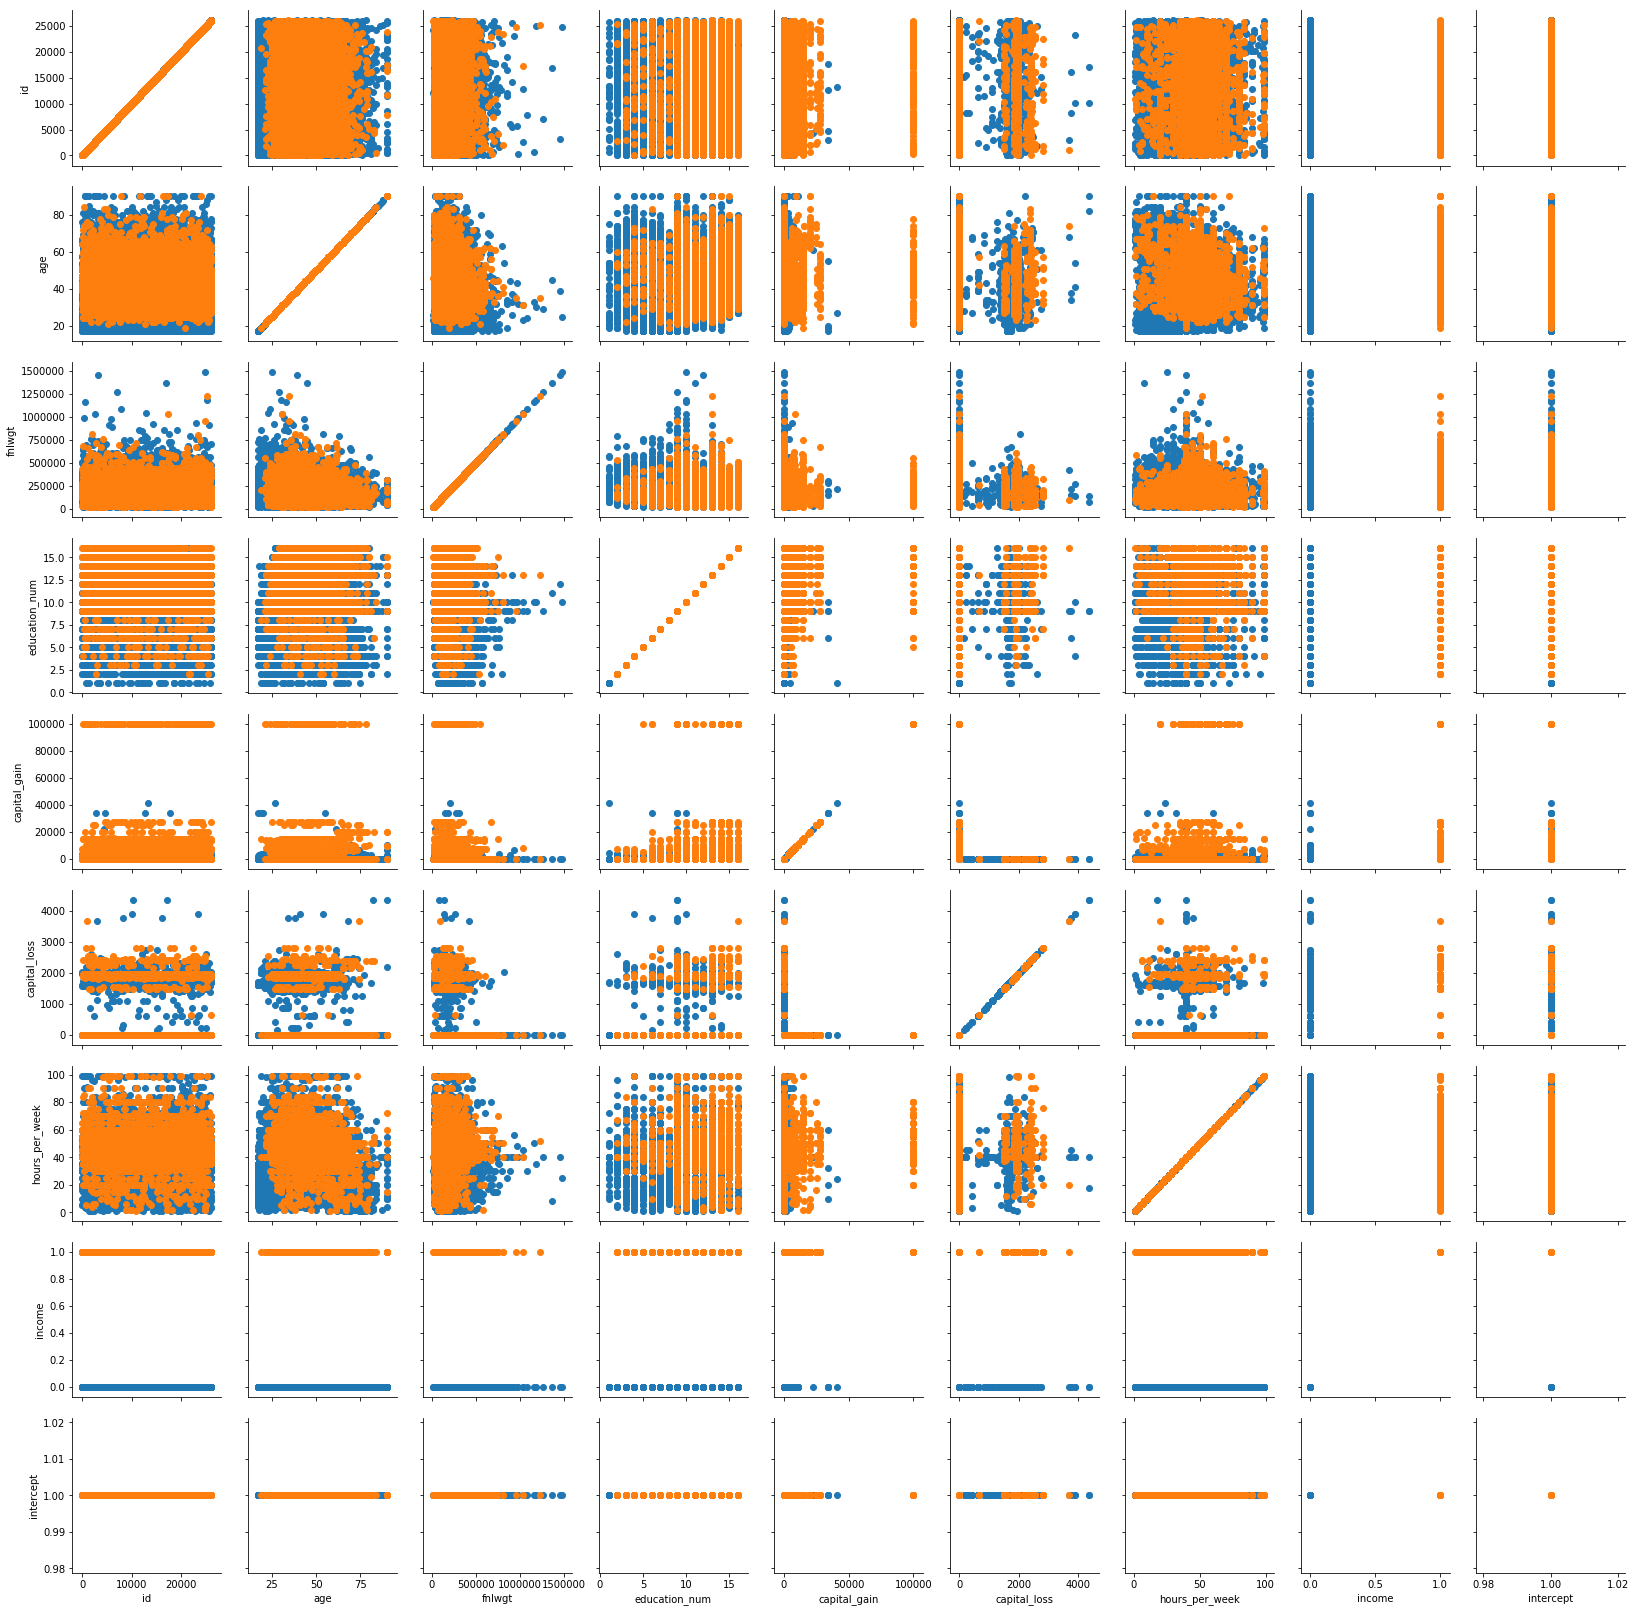

In [ ]:
g=sns.PairGrid(data, hue="income")
g.map(plt.scatter)

E:\programs\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


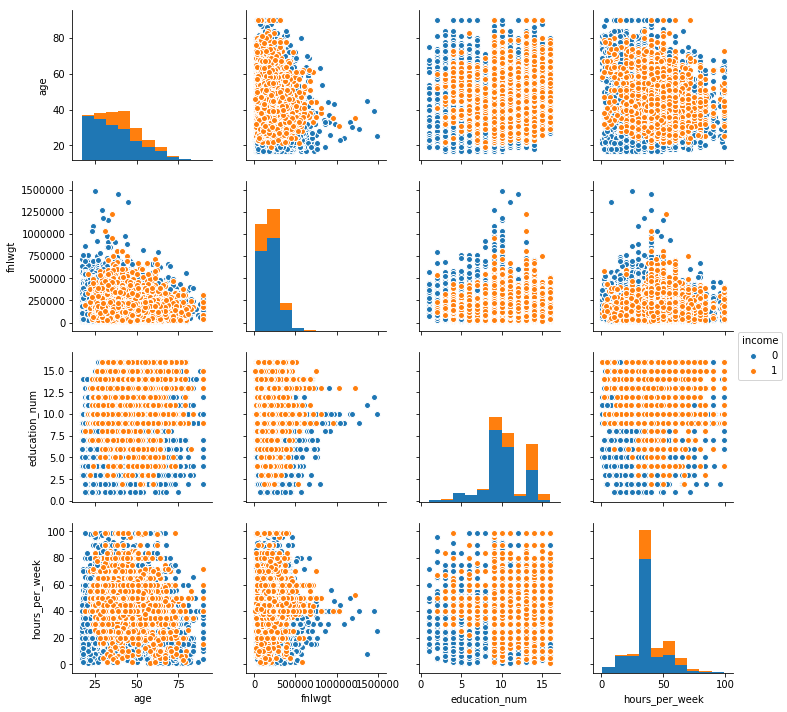

In [ ]:
# numeric/continuous data only
#상관관계1
sns.pairplot(data, vars=['age', 'fnlwgt', 'education_num', 'hours_per_week'], hue='income', )
plt.show()

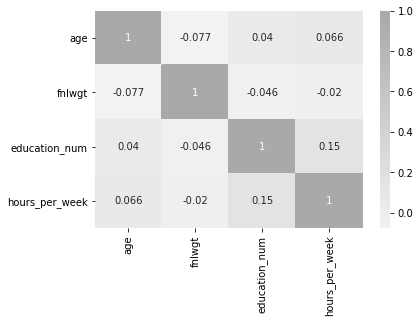

In [ ]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(data[['age', 'fnlwgt', 'education_num', 'hours_per_week']].corr(), annot=True, cmap=cmap)
plt.show()
#상관관계2

In [ ]:
"""
hours_per_week, education_num 을 categorical로 다루는 것이 의미가 없어보임 
"""

'\nhours_per_week, education_num 을 categorical로 다루는 것이 의미가 없어보임 \n'

In [ ]:
data.drop(columns='edu_num_high')

# 범주형 데이터 처리 / 모델 테스트

In [5]:
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)
data['income'].value_counts(normalize=True)

0    0.757956
1    0.242044
Name: income, dtype: float64

In [6]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.4MB/s 


In [7]:
import category_encoders as ce


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
"""
#One-hot - 각 범주형 변수 값들을 0, 1로 매핑
#BinaryEncoding - onehot과 비슷하나 더 적은 메모리 차지 빠른속도
#LabelEncoding - n개 카테고리를 1~n으로 숫자를 부여, 순서가있는 데이터에 적합할듯 숫자들 사이에 관계 존재
#OrdinalEncoding - 순서형 자료에 적합
#Hashing - 범주형 변수들을 더 높은 차원으로 벡터화 
#Catboost(supervised) 

full-rank - 행렬의 모든 row, col이 독립. one-hot인코딩 방식으로 지정
reduced-rank - 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓는다. 다른 범주형 값을 가지는 경우는 기준값에 추가적인 특성이 있는 것으로 간주

데이터들은 모두 not null이지만 ?인 것들도 있음 
education_num 이 있는데 education이 굳이 필요할까?


1) 일단 ?로 되어있는 데이터들은 제거하고 해본다 > 10프로 미만이어서 삭제하기로 함 
2) 범주형 데이터의 결측치는 어떻게 대체할 수 있는가 

"""


In [ ]:
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [ ]:
# 결측치 보기 // 대개 workclass의 결측치는 occupation에 포함된다
for col in cat_cols:
    temp = [ele for ele in data[col] if ele == "?" ]
    
    print(col , " : ", len(temp))

workclass  :  1502
education  :  0
marital_status  :  0
occupation  :  1508
relationship  :  0
race  :  0
sex  :  0
native_country  :  456


결측치가 10% 만이기 때문에 삭제한다

In [ ]:
index = data[data['occupation'] == '?'].index
data = data.drop(index)
index = data[data['native_country'] == '?'].index
data = data.drop(index)
index = data[data['workclass'] == '?'].index
data = data.drop(index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24106 entries, 0 to 26047
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              24106 non-null  int64 
 1   age             24106 non-null  int64 
 2   workclass       24106 non-null  object
 3   fnlwgt          24106 non-null  int64 
 4   education       24106 non-null  object
 5   education_num   24106 non-null  int64 
 6   marital_status  24106 non-null  object
 7   occupation      24106 non-null  object
 8   relationship    24106 non-null  object
 9   race            24106 non-null  object
 10  sex             24106 non-null  object
 11  capital_gain    24106 non-null  int64 
 12  capital_loss    24106 non-null  int64 
 13  hours_per_week  24106 non-null  int64 
 14  native_country  24106 non-null  object
 15  income          24106 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.8+ MB


### One-hot Encoding

In [ ]:
import copy
test = pd.read_csv('test.csv')
data_copy = copy.deepcopy(data)
test_copy = copy.deepcopy(test)

y = data['income']
data_copy = data_copy.drop(['income'], axis=1)

data_ = pd.concat([data_copy, test_copy])


In [ ]:
encoder=ce.OneHotEncoder(cols=cat_cols,handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_ = encoder.fit_transform(data_)
print(len(data_copy), len(test_copy))

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


24106 6512


In [ ]:
data_.head()

,id,age,workclass_Private,workclass_State-gov,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Federal-gov,workclass_Self-emp-inc,workclass_Without-pay,workclass_?,workclass_Never-worked,fnlwgt,education_HS-grad,education_9th,education_Some-college,education_Bachelors,education_11th,education_1st-4th,education_5th-6th,education_Assoc-acdm,education_10th,education_Prof-school,education_7th-8th,education_Masters,education_Assoc-voc,education_Doctorate,education_12th,education_Preschool,education_num,marital_status_Married-civ-spouse,marital_status_Never-married,marital_status_Separated,marital_status_Married-spouse-absent,marital_status_Divorced,marital_status_Widowed,marital_status_Married-AF-spouse,occupation_Sales,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,...,native_country_Poland,native_country_Philippines,native_country_Puerto-Rico,native_country_Vietnam,native_country_Germany,native_country_Cuba,native_country_France,native_country_Ireland,native_country_El-Salvador,native_country_Guatemala,native_country_Haiti,native_country_Trinadad&Tobago,native_country_Jamaica,native_country_Canada,native_country_Columbia,native_country_Peru,native_country_Japan,native_country_Dominican-Republic,native_country_China,native_country_England,native_country_Iran,native_country_India,native_country_Nicaragua,native_country_South,native_country_Taiwan,native_country_Italy,native_country_Thailand,native_country_Ecuador,native_country_Portugal,native_country_Hungary,native_country_Greece,native_country_Honduras,native_country_Hong,native_country_Outlying-US(Guam-USVI-etc),native_country_Cambodia,native_country_Scotland,native_country_Yugoslavia,native_country_Laos,native_country_?,native_country_Holand-Netherlands
0,0,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = data_[:len(data_copy)]
X_test = data_[len(data_copy):len(data_copy)+len(test_copy)]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
# X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [ ]:
encoded_Y.shape

(24106,)

In [ ]:
X.shape

(24106, 109)

In [ ]:
import tensorflow as tf

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(109, input_dim=109, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(54, input_dim=109, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)

pipeline.fit(X, encoded_Y)


Epoch 1/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3763 - acc: 0.8273
Epoch 2/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3360 - acc: 0.8458
Epoch 3/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3284 - acc: 0.8478
Epoch 4/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3217 - acc: 0.8508
Epoch 5/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3205 - acc: 0.8513
Epoch 6/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3163 - acc: 0.8522
Epoch 7/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3124 - acc: 0.8573
Epoch 8/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3121 - acc: 0.8548
Epoch 9/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3086 - acc: 0.8571
Epoch 10/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3084 - acc: 0.8580
Epoch 11/100
2411/2

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3ebfaf83c8>)],
         verbose=False)

In [ ]:
kfold = StratifiedKFold(n_splits=7, shuffle=True)
# results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
results  = cross_validate(pipeline, X, encoded_Y, cv=kfold, verbose=1,
               scoring=['accuracy', 'roc_auc'], 
               return_train_score=True)


print(results)
print("Standardized: %.2f%% (%.2f%%)" % (results['train_accuracy'].mean()*100, results['train_accuracy'].std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
{'fit_time': array([700.5531764 , 691.02238512, 695.4990716 , 654.35896516,
       663.42434001, 655.18041515, 651.72768164]), 'score_time': array([0.87556696, 0.88584757, 0.84032607, 0.83188581, 0.84067154,
       0.82172513, 0.82672977]), 'test_accuracy': array([0.84494774, 0.83855981, 0.84436702, 0.84639954, 0.84465738,
       0.85042114, 0.84461226]), 'train_accuracy': array([0.89536347, 0.89526667, 0.90088084, 0.89395993, 0.89550866,
       0.89677201, 0.89730436]), 'test_roc_auc': array([0.89913642, 0.89465888, 0.89038993, 0.89876745, 0.89838501,
       0.90681614, 0.89420807]), 'train_ro

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 79.2min finished


In [ ]:
r = pipeline.predict(X_test)
# ACC : 0.81

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
652/652 [==============================] - 1s 970us/step


In [ ]:
import csv
f = open('./result.csv', 'w')
wr = csv.writer(f)
for i in range(len(r)):
  wr.writerow([r[i][0]])

f.close()

#### education_num > 9 인경우 1로, 아닌경우 0 (education_num_high) / education_num은 삭제 



In [ ]:
import copy
test = pd.read_csv('test.csv')
data_copy = copy.deepcopy(data)
test_copy = copy.deepcopy(test)

data_copy['edu_num_high'] = data_copy['education_num'] > 8
test_copy['edu_num_high'] = test_copy['education_num'] > 8

y = data['income']
data_copy = data_copy.drop(['income', 'education_num'], axis=1)
test_copy = test_copy.drop(['education_num'], axis=1)
data_ = pd.concat([data_copy, test_copy])

encoder=ce.OneHotEncoder(cols=cat_cols,handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_ = encoder.fit_transform(data_)
print(len(data_copy), len(test_copy))

X = data_[:len(data_copy)]
X_test = data_[len(data_copy):len(data_copy)+len(test_copy)]
print(len(X), len(X_test))



/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


24106 6512
24106 6512


### BackwardDifferenceEncoder

In [ ]:
import copy
from category_encoders import BackwardDifferenceEncoder

test = pd.read_csv('test.csv')
data_copy = copy.deepcopy(data)
test_copy = copy.deepcopy(test)

# education_num 삭제하고 edu_num_high 1/0으로 치환함 
data_copy["edu_num_high"] = data_copy["education_num"].apply(lambda x: 1.0 if x > 8 else 0.0)
test_copy["edu_num_high"] = test_copy["education_num"].apply(lambda x: 1.0 if x > 8 else 0.0)


y = data['income']
data_copy = data_copy.drop(['income', 'education_num'], axis=1)
test_copy = test_copy.drop(['education_num'], axis=1)
# data_ = pd.concat([data_copy, test_copy])

In [ ]:
data_.head()

,id,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,edu_num_high
0,0,40,Private,168538,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1.0
1,1,17,Private,101626,9th,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0.0
2,2,18,Private,353358,Some-college,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,1.0
3,3,21,Private,151158,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,1.0
5,5,43,Private,236985,HS-grad,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = BackwardDifferenceEncoder()
data_ = encoder.fit_transform(data_copy)

X = data_
X_test = encoder.transform(test_copy)
print(len(X), len(X_test))


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


24106 6512


In [ ]:
X.head()

,intercept,id,age,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,fnlwgt,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,marital_status_0,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,...,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,edu_num_high
0,1,0,40,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,168538,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.928571,-0.857143,-0.785714,-0.714286,-0.642857,-0.571429,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
1,1,1,17,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,101626,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,-0.857143,-0.785714,-0.714286,-0.642857,-0.571429,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,0.0
2,1,2,18,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,353358,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,-0.785714,-0.714286,-0.642857,-0.571429,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
3,1,3,21,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,151158,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,-0.714286,-0.642857,-0.571429,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
5,1,5,43,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,236985,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,0.285714,-0.642857,-0.571429,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.4

In [ ]:
X_test.head()

,intercept,id,age,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,fnlwgt,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,marital_status_0,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,...,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,edu_num_high
0,1,0,28,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,67661,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,0.285714,0.357143,-0.571429,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
1,1,1,40,0.142857,0.285714,0.428571,0.571429,0.714286,-0.142857,37869,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,0.285714,0.357143,0.428571,0.5,0.571429,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
2,1,2,20,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,109952,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,0.285714,0.357143,0.428571,-0.5,-0.428571,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
3,1,3,40,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,114537,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,0.625,0.6875,0.75,-0.1875,-0.125,-0.0625,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,0.285714,0.357143,0.428571,0.5,0.571429,-0.357143,...,-0.975,-0.95,-0.925,-0.9,-0.875,-0.85,-0.825,-0.8,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-0.175,-0.15,-0.125,-0.1,-0.075,-0.05,-0.025,1.0
4,1,4,37,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,51264,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,0.625,0.6875,0.75,0.8125,-0.125,-0.0625,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.071429,0.142857,0.214286,-0.714286,-0.642857,-0.571429,-0.5,-0.428571,-0.357143,...,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,-0.775,-0.75,-0.725,-0.7,-0.675,-0.65,-0.625,-0.6,-0.575,-0.55,-0.525,-0.5,-0.475,-0.45,-0.425,-0.4,-0.375,-0.35,-0.325,-0.3,-0.275,-0.25,-0.225,-0.2,-

In [ ]:
encoder_y = LabelEncoder()
encoder_y.fit(y)
encoded_Y = encoder_y.transform(y)

In [ ]:
import tensorflow as tf

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(102, input_dim=102, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, input_dim=102, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(97, input_dim=97, activation='relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)

pipeline.fit(X, encoded_Y)

Epoch 1/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.4007 - acc: 0.8097
Epoch 2/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3536 - acc: 0.8379
Epoch 3/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3415 - acc: 0.8433
Epoch 4/100
2411/2411 [==============================] - 7s 3ms/step - loss: 0.3375 - acc: 0.8445
Epoch 5/100
2411/2411 [==============================] - 6s 3ms/step - loss: 0.3339 - acc: 0.8473
Epoch 6/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3296 - acc: 0.8472
Epoch 7/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3284 - acc: 0.8476
Epoch 8/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3272 - acc: 0.8509
Epoch 9/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3249 - acc: 0.8498
Epoch 10/100
2411/2411 [==============================] - 6s 2ms/step - loss: 0.3236 - acc: 0.8522
Epoch 11/100
2411/2

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f55fa664390>)],
         verbose=False)

In [ ]:
r = pipeline.predict(X_test)
# accuracy : 0.85

652/652 [==============================] - 1s 948us/step


In [ ]:
import csv
f = open('./result.csv', 'w')
wr = csv.writer(f)
for i in range(len(r)):
  wr.writerow([r[i][0]])

f.close()

#### fnlwgt 제외

In [10]:
import copy
from category_encoders import BackwardDifferenceEncoder

test = pd.read_csv('test.csv')
data_copy = copy.deepcopy(data)
test_copy = copy.deepcopy(test)

# education_num 삭제하고 edu_num_high 1/0으로 치환함 
data_copy["edu_num_high"] = data_copy["education_num"].apply(lambda x: 1 if x > 8 else 0)
test_copy["edu_num_high"] = test_copy["education_num"].apply(lambda x: 1 if x > 8 else 0)


y = data['income']
data_copy = data_copy.drop(['income', 'education_num', 'fnlwgt'], axis=1)
test_copy = test_copy.drop(['education_num', 'fnlwgt'], axis=1)
# data_ = pd.concat([data_copy, test_copy])

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = BackwardDifferenceEncoder()
data_ = encoder.fit_transform(data_copy)

X = data_
X_test = encoder.transform(test_copy)
print(len(X), len(X_test))

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


26049 6512


In [12]:
encoder_y = LabelEncoder()
encoder_y.fit(y)
encoded_Y = encoder_y.transform(y)

In [13]:
X.head()

,intercept,id,age,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,marital_status_0,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,...,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,edu_num_high
0,1,0,40,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.933333,-0.866667,-0.8,-0.733333,-0.666667,-0.6,-0.533333,-0.466667,...,-0.95122,-0.926829,-0.902439,-0.878049,-0.853659,-0.829268,-0.804878,-0.780488,-0.756098,-0.731707,-0.707317,-0.682927,-0.658537,-0.634146,-0.609756,-0.585366,-0.560976,-0.536585,-0.512195,-0.487805,-0.463415,-0.439024,-0.414634,-0.390244,-0.365854,-0.341463,-0.317073,-0.292683,-0.268293,-0.243902,-0.219512,-0.195122,-0.170732,-0.146341,-0.121951,-0.097561,-0.073171,-0.04878,-0.02439,1
1,1,1,17,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.066667,-0.866667,-0.8,-0.733333,-0.666667,-0.6,-0.533333,-0.466667,...,-0.95122,-0.926829,-0.902439,-0.878049,-0.853659,-0.829268,-0.804878,-0.780488,-0.756098,-0.731707,-0.707317,-0.682927,-0.658537,-0.634146,-0.609756,-0.585366,-0.560976,-0.536585,-0.512195,-0.487805,-0.463415,-0.439024,-0.414634,-0.390244,-0.365854,-0.341463,-0.317073,-0.292683,-0.268293,-0.243902,-0.219512,-0.195122,-0.170732,-0.146341,-0.121951,-0.097561,-0.073171,-0.04878,-0.02439,0
2,1,2,18,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.066667,0.133333,-0.8,-0.733333,-0.666667,-0.6,-0.533333,-0.466667,...,-0.95122,-0.926829,-0.902439,-0.878049,-0.853659,-0.829268,-0.804878,-0.780488,-0.756098,-0.731707,-0.707317,-0.682927,-0.658537,-0.634146,-0.609756,-0.585366,-0.560976,-0.536585,-0.512195,-0.487805,-0.463415,-0.439024,-0.414634,-0.390244,-0.365854,-0.341463,-0.317073,-0.292683,-0.268293,-0.243902,-0.219512,-0.195122,-0.170732,-0.146341,-0.121951,-0.097561,-0.073171,-0.04878,-0.02439,1
3,1,3,21,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.066667,0.133333,0.2,-0.733333,-0.666667,-0.6,-0.533333,-0.466667,...,-0.95122,-0.926829,-0.902439,-0.878049,-0.853659,-0.829268,-0.804878,-0.780488,-0.756098,-0.731707,-0.707317,-0.682927,-0.658537,-0.634146,-0.609756,-0.585366,-0.560976,-0.536585,-0.512195,-0.487805,-0.463415,-0.439024,-0.414634,-0.390244,-0.365854,-0.341463,-0.317073,-0.292683,-0.268293,-0.243902,-0.21

In [14]:
import tensorflow as tf

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, input_dim=102, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [23]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)

X, encoded_Y = shuffle(X, encoded_Y)
pipeline.fit(X, encoded_Y)

Epoch 1/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3724 - acc: 0.8270
Epoch 2/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3327 - acc: 0.8450
Epoch 3/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3277 - acc: 0.8477
Epoch 4/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3220 - acc: 0.8516
Epoch 5/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3195 - acc: 0.8516
Epoch 6/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3183 - acc: 0.8526
Epoch 7/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3157 - acc: 0.8548
Epoch 8/100
2605/2605 [==============================] - 7s 3ms/step - loss: 0.3141 - acc: 0.8524
Epoch 9/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3125 - acc: 0.8557
Epoch 10/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3118 - acc: 0.8560
Epoch 11/100
2605/2

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7da5ca198>)],
         verbose=False)

In [24]:
import csv

r = pipeline.predict(X_test)
f = open('./result.csv', 'w')
wr = csv.writer(f)
for i in range(len(r)):
  wr.writerow([r[i][0]])

f.close()
# acc : 0.853 (highest so far)

652/652 [==============================] - 1s 1ms/step


### Leave One Out

In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import LeaveOneOutEncoder

import copy

test = pd.read_csv('test.csv')
data_copy = copy.deepcopy(data)
test_copy = copy.deepcopy(test)

# education_num 삭제하고 edu_num_high 1/0으로 치환함 
data_copy["edu_num_high"] = data_copy["education_num"].apply(lambda x: 1.0 if x > 8 else 0.0)
test_copy["edu_num_high"] = test_copy["education_num"].apply(lambda x: 1.0 if x > 8 else 0.0)

y = data['income']
data_copy = data_copy.drop(['income', 'education_num'], axis=1)
test_copy = test_copy.drop(['education_num'], axis=1)
# data_ = pd.concat([data_copy, test_copy])

encoder = LeaveOneOutEncoder()
data_ = encoder.fit_transform(data_copy, y)

X = data_[:len(data_copy)]
X_test = test_copy
print(len(X), len(X_test))


24106 6512


In [ ]:
X.head()

,id,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,edu_num_high
0,0,40,0.220643,168538,0.163735,0.458033,0.271710,0.458308,0.265811,0.315545,0,0,60,0.256213,1.0
1,1,17,0.220699,101626,0.054945,0.049435,0.126851,0.013611,0.265859,0.315606,0,0,20,0.256259,0.0
2,2,18,0.220699,353358,0.202792,0.049435,0.041160,0.013611,0.265859,0.315606,0,0,16,0.256259,1.0
3,3,21,0.220699,151158,0.202792,0.049435,0.450543,0.013611,0.265859,0.114889,0,0,25,0.256259,1.0
5,5,43,0.220699,236985,0.163862,0.458122,0.226068,0.458409,0.127755,0.315606,0,0,40,0.256259,1.0


In [ ]:
import tensorflow as tf

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(7, input_dim=15, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=70, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)

pipeline.fit(X, encoded_Y)

In [ ]:
import csv

r = pipeline.predict(X_test)
f = open('./result.csv', 'w')
wr = csv.writer(f)
for i in range(len(r)):
  wr.writerow([r[i][0]])

f.close()

In [ ]:
encoder.fit_transform(X_test)
# acc : 0.69

## Hashing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import HashingEncoder

import copy

test = pd.read_csv('test.csv')
data_copy = copy.deepcopy(data)
test_copy = copy.deepcopy(test)

# education_num 삭제하고 edu_num_high 1/0으로 치환함 
data_copy["edu_num_high"] = data_copy["education_num"].apply(lambda x: 1.0 if x > 8 else 0.0)
test_copy["edu_num_high"] = test_copy["education_num"].apply(lambda x: 1.0 if x > 8 else 0.0)

y = data['income']
data_copy = data_copy.drop(['income', 'education_num'], axis=1)
test_copy = test_copy.drop(['education_num'], axis=1)
# data_ = pd.concat([data_copy, test_copy])

encoder = HashingEncoder()
data_ = encoder.fit_transform(data_copy)

X = data_

X_test = encoder.transform(test_copy)
print(len(X), len(X_test))

In [ ]:
X_test.head()

,id,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,edu_num_high
0,0,28,Private,67661,Some-college,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,1.0
1,1,40,Self-emp-inc,37869,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1.0
2,2,20,Private,109952,Some-college,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,1.0
3,3,40,Private,114537,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1.0
4,4,37,Private,51264,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France,1.0


In [ ]:
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,id,age,fnlwgt,capital_gain,capital_loss,hours_per_week,edu_num_high
0,1,1,1,1,0,2,2,0,0,40,168538,0,0,60,1.0
1,0,3,0,0,1,1,2,1,1,17,101626,0,0,20,0.0
2,1,3,0,0,0,1,2,1,2,18,353358,0,0,16,1.0
3,1,3,0,0,0,0,2,2,3,21,151158,0,0,25,1.0
5,1,1,2,1,0,1,2,0,5,43,236985,0,0,40,1.0


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
encoder_y = LabelEncoder()
encoder_y.fit(y)
encoded_Y = encoder_y.transform(y)

In [ ]:
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=16, verbose=1)))
pipeline = Pipeline(estimators)

pipeline.fit(X, encoded_Y)
# acc : 0.82

Epoch 1/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.4556 - acc: 0.7603
Epoch 2/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.4098 - acc: 0.7953
Epoch 3/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.3935 - acc: 0.8049
Epoch 4/100
1507/1507 [==============================] - 5s 3ms/step - loss: 0.3820 - acc: 0.8106
Epoch 5/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.3781 - acc: 0.8177
Epoch 6/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.3748 - acc: 0.8181
Epoch 7/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.3724 - acc: 0.8190
Epoch 8/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.3727 - acc: 0.8185
Epoch 9/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.3725 - acc: 0.8194
Epoch 10/100
1507/1507 [==============================] - 5s 3ms/step - loss: 0.3731 - acc: 0.8193
Epoch 11/100
1507/1

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f55f3c9aac8>)],
         verbose=False)

In [ ]:
import csv
r = pipeline.predict(X_test)
f = open('./result.csv', 'w')
wr = csv.writer(f)
for i in range(len(r)):
  wr.writerow([r[i][0]])

f.close()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
407/407 [==============================] - 1s 2ms/step


### K-MEANS


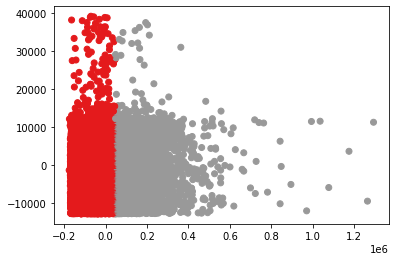

In [ ]:
from sklearn.cluster import KMeans
 
model = KMeans(init="k-means++", n_clusters=2, random_state=0)
model.fit(X)
y_pred = model.labels_


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X__ = pca.fit_transform(X)

plt.scatter(X__[:, 0], X__[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

In [ ]:
r = model.predict(X_test)
import csv
f = open('./result.csv', 'w')
wr = csv.writer(f)
for i in range(len(r)):
  wr.writerow([r[i]])

f.close()

# accuracy : 0.64